[]


C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


TypeError: 'module' object is not callable

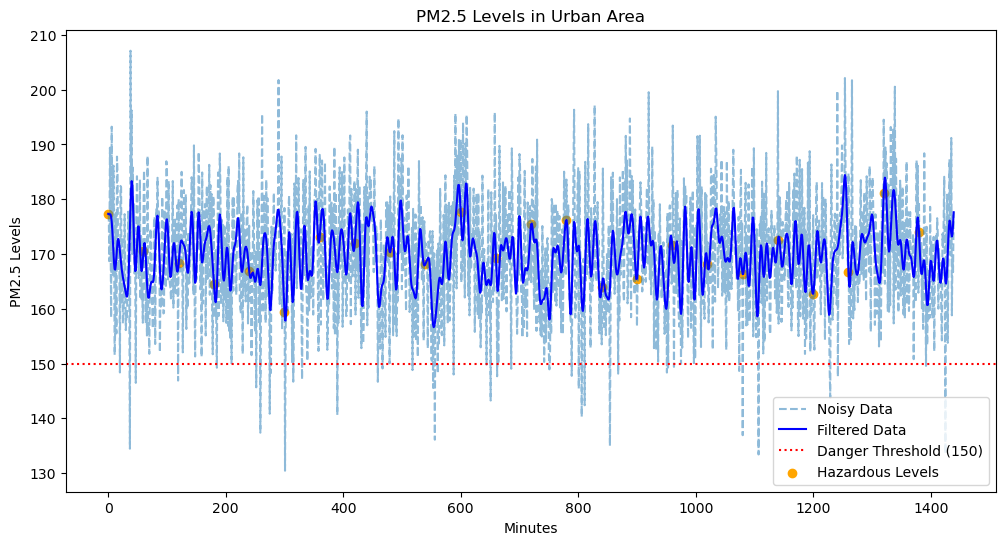

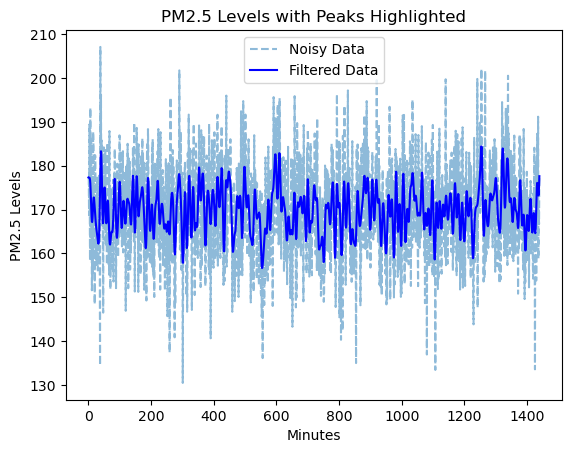

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt


pollution_data = np.random.normal(loc=170, scale=10, size=1440) + np.random.normal(scale=5, size=1440)

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def lowpass_filter(data, cutoff=0.1, fs=1.0, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

filtered_data = lowpass_filter(pollution_data)

def hourly_averages(data):
    return np.mean(data.reshape(-1, 60), axis=1)

hourly_avg = hourly_averages(filtered_data)
  
    
    
plt.figure(figsize=(12, 6))
plt.plot(pollution_data, label='Noisy Data', linestyle='--', alpha=0.5)
plt.plot(filtered_data, label='Filtered Data', color='blue')
plt.axhline(150, color='red', linestyle=':', label='Danger Threshold (150)')
plt.scatter(np.where(hourly_avg > 150)[0] * 60, filtered_data[np.where(hourly_avg > 150)[0] * 60], color='orange', marker='o', label='Hazardous Levels')
plt.title('PM2.5 Levels in Urban Area')
plt.xlabel('Minutes')
plt.ylabel('PM2.5 Levels')
plt.legend()
plt.show()

def detect_peaks(data, threshold=200, duration=10):
    peaks = []
    count = 0
    for i in range(len(data)):
        if data[i] > threshold:
            count += 1
        else:
            if count > duration:
                peaks.append((i - count, i))
            count = 0
    if count > duration:
        peaks.append((len(data) - count, len(data)))
    return peaks

peaks = detect_peaks(pollution_data)

for start, end in peaks:
    plt.axvspan(start, end, color='yellow', alpha=0.3)

plt.plot(pollution_data, label='Noisy Data', linestyle='--', alpha=0.5)
plt.plot(filtered_data, label='Filtered Data', color='blue')
plt.title('PM2.5 Levels with Peaks Highlighted')
plt.xlabel('Minutes')
plt.ylabel('PM2.5 Levels')
plt.legend()
plt.show()
